# Hollywood Black List Analysis

In 2005 Franklin Leonard surveyed almost 100 film industry development executives about their favorite scripts from that year that had not been made as feature films. Since then the voter pool has grown to 500 film executives, 60% of whom typically respond.

Over 300 Black List screenplays have been made as feature films. Those films have earned over $26 billion in worldwide box office, have been nominated for 264 Academy Awards, and have won 48, including Best Pictures SLUMDOG MILLIONAIRE, THE KING'S SPEECH, ARGO and SPOTLIGHT, and ten of the last twenty screenwriting Oscars.

# Scope of Work

Objectives:
    
    1. Create year comparisons based on information about financing, gender, and genre.
    
    2. Run for loops that search descriptions for specific words in order to group all movie titles by category.
    
    3. Analyze percentage of movies by category from data set with genres included.

Methods:
    
    1. Scrape data from the annual Black List websites. Transpose data in sheets and create a Sqlite database of all years of data.
   
    2. Complete exploration of data in SQL, Python, and Tableau.
    
    3.Create for loop functions to search movie descriptions to identify percentages of movie titles associated with specific genres.
    
    4. Use Scikit_learn topic modeling functions to cluster popular words in Python. Compare how many of the cluster words it would take to account for a higher percentage of movie titles than the words we initially used to categorize movie
    titles. 

# Summary of Analysis

- 81% of screenwriters whose scripts made the black list are men.

- Since 2015 the amount of female screenwriters have doubled to 33% of the total scripts in the Black List. If this trend continues for the next 5 years we can expect equal gender representation of scripts in the black list.

- When searched the word 'man' appears in 13.73% of script descriptions. 'Woman' appears in only 7.49% of script descriptions.

- The percentage of scripts with financing that made the black list has been declining since 2014. This may signify that the black list is returning to it's original purpose of bringing light to great scripts that might otherwise go unnoticed.

- We intially searched 42 words in the script descriptions in an attempt to account for all of the movie titles in the list. We were only able to account for 68% of script titles with those words. 

-human words- (love, relationship, friendship, friend, romance, romantic, true, biopic, biographical, kidnapped, murder, murdered, death, spy, spies, killer, serial killer, assassin, prison, imprisonment, cop, cops, police, torture, revenge, vengeance, war, civilian, soldier, comedy, romcom, funny, bank, rob, heist, mob, robot, future, space, alien.) 

- We used a cluster modeling function to identify popular topics among the movie descriptions. Through clustering Python was able to identify 11 words that when searched in our original search function were able to account for a higher percentage of script titles than our 42 words. The short list of cluster words accounted for 70% of script titles.

-Python words- (life, old, young, year, man, story, true, based, world, war, family)

In [1]:
#import all tools needed for analysis
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Create SQLite connection to the database I made
database = "BlackListComplete.db"
connection = sql.connect(database)

In [3]:
#Create SQL query to union all data.

query = '''SELECT * FROM BlackListComplete
'''
df = pd.read_sql_query(query, connection)
df.head()

,Year,Numberofvotes,Title,Screenwriter,Gender,Description,Agency,Agents,Management,Managers,Producer,Financier
0,2008,67,THE BEAVER,Kyle Killen,M,"Walter Black, a depressed toy manufacturer, lo...",WME,Cliff Roberts,Anonymous Content,Keith Redmon,Anonymous Content,
1,2008,61,THE ORANGES,Jay Reiss & Ian Helfer,M,Two New Jersey families are thrown into comic ...,"CAA, Gersh","Spencer Baumgarten, Greg McKnight, Jessica Mat...","Mosaic Media Group, Principal Entertainment","Paul Nelson, Jimmy Miller, Ilan Breil, Danny S...",A Likely Story,Media Rights Capital
2,2008,44,BUTTER,Jason Micallef,M,"Destiny, a black foster child, faces off again...",Endeavor,"Phil D‚Äôamecourt, Rich Cook",Washington Square Arts,Josh McGuire,Michael De Luca,
3,2008,42,BIG HOLE,Michael Gilio,M,"Lee, an old, grumpy ex-cowboy, loses $30,000 t...",UTA,Julien Thuan,Industry Entertainment,Eryn Brown,Aversano Films,
4,2008,40,THE LOW DWELLER,Brad Ingels,M,"Charlie Slim‚Äù Hendrick, a don‚Äôt-eff-with-m...",WME,"Mike Esola, Rob Carlson",Energy Entertainment,"Brooklyn Weaver, Adam Marshall","Scott Free Productions, Energy Entertainment, ...",Relativity


In [4]:
df.describe()

,Year,Numberofvotes,Title,Screenwriter,Gender,Description,Agency,Agents,Management,Managers,Producer,Financier
count,801,801,801,801,801,801,801,801,801,801,801,801
unique,10,53,798,714,3,796,44,542,176,353,452,126
top,2008,6,HOMEGROWN,Dan Fogelman,M,,WME,,,,,
freq,105,110,2,5,656,3,187,49,150,148,206,461


In [5]:
df_2008 = df[(df.Year == '2008')]
df_2009 = df[(df.Year == '2009')]
df_2010 = df[(df.Year == '2010')]
df_2011 = df[(df.Year == '2011')]
df_2012 = df[(df.Year == '2012')]
df_2013 = df[(df.Year == '2013')]
df_2014 = df[(df.Year == '2014')]
df_2015 = df[(df.Year == '2015')]
df_2016 = df[(df.Year == '2016')]
df_2017 = df[(df.Year == '2017')]

# Gender of Screenwriters

In [6]:
#create a finction to calculate percentage of each gender of screenwriter
def calc_Grate(df, column, id):
    num_gender = df[df[column] == id].shape[0]
    return num_gender / float(len(df)) * 100

In [7]:
#test function
calc_Grate(df, 'Gender', 'M')

81.8976279650437

(0, 100)

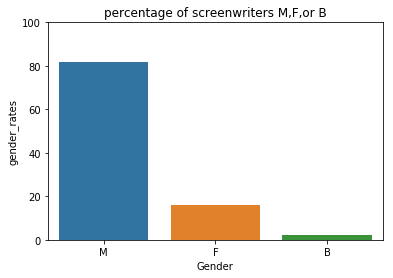

In [8]:
#create open list to get gender rates
gender_rates = []

#run loop to look for unique gender values
for num_screenwriters in df.Gender.unique():

#append new list to the list of unique values
    gender_rates.append(pd.DataFrame([[num_screenwriters, calc_Grate(df, 'Gender', num_screenwriters)]],columns = ['Gender','gender_rates']))

#create data frame for the gender information    
percentage_gender = pd.concat(gender_rates)

sns.barplot(
    x='Gender',
    y='gender_rates',
    data=percentage_gender,
).set_title('percentage of screenwriters M,F,or B')

plt.ylim(0, 100)

# Movie Financing

In [9]:
financed = df[(df.Financier != '')]


In [10]:
#create a function to find the percentage of movies that have financing by year
def calc_Grate(df, column, id):
    num_movies = df[df[column] == id].shape[0]
    num_financed = financed[financed[column] == id].shape[0]
    return num_financed / float(num_movies) * 100

(0, 100)

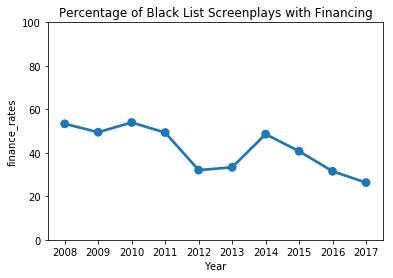

In [11]:
#create open list to get percentage of movies with financing
finance_rates = []

#run loop to look for unique finance values
for num_financed in df.Year.unique():

#append new list to the list of unique values
    finance_rates.append(pd.DataFrame([[num_financed, calc_Grate(df, 'Year', num_financed)]],columns = ['Year','finance_rates']))

#create data frame for the financing information    
percentage_financed = pd.concat(finance_rates)

sns.pointplot(
    x='Year',
    y='finance_rates',
    data=percentage_financed,
).set_title('Percentage of Black List Screenplays with Financing')

plt.ylim(0, 100)

# Romantic Movies

In [12]:
#import count function
from collections import Counter

#create list of words I want to seach for relationship descriptions
relationships = ['love', 'relationship', 'friendship', ' friend', 'romance', 'romantic']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of relationship words
    for r in relationships:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
rela_movies = len(list(set(Title)))/float(len(df))*100
rela_movies

16.729088639201

In [13]:
#create list to hold the number of movies by year
mega_list = []
#iterate through the unique years
for i in df.Year.unique(): 
#create a list to hold the number of movies temporarily by individual year
    super_list = []
#iterate through the unique years
    for f in range(len(df[df.Year == i])): 
#find the relationship movies in the unique years
        for r in relationships: 
#if the relationship words are in the description lock the result to the index
            if r in df[df.Year == i].Description.iloc[f]:

#lock each individual super list to the the index
                super_list.append(df[df.Year == i].Title.iloc[f])
#append the super lists counts to the mega list
    mega_list.append(len(set(super_list)))
mega_list

[26, 21, 7, 12, 11, 13, 9, 11, 17, 7]

In [14]:
#create full counts of movies by year
years = []
years.append(len(df_2008))
years.append(len(df_2009))
years.append(len(df_2010))
years.append(len(df_2011))
years.append(len(df_2012))
years.append(len(df_2013))
years.append(len(df_2014))
years.append(len(df_2015))
years.append(len(df_2016))
years.append(len(df_2017))
print years

[105, 97, 76, 73, 78, 72, 70, 81, 73, 76]


In [15]:
#create a list of years to match the other value lists to
years_date = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
years_date

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [16]:
#create a data frame of the three lists
romance_df = pd.DataFrame({'Years' : years_date,
 'Romance count' : mega_list,
 'Total count':years
  }, columns=['Years','Romance count', 'Total count'])
romance_df

,Years,Romance count,Total count
0,2008,26,105
1,2009,21,97
2,2010,7,76
3,2011,12,73
4,2012,11,78
5,2013,13,72
6,2014,9,70
7,2015,11,81
8,2016,17,73
9,2017,7,76


In [17]:
#calculate the percentage of movies that are romantic by year
romance_df['Love Stories'] = romance_df['Romance count']/romance_df['Total count'] * 100
romance_df

,Years,Romance count,Total count,Love Stories
0,2008,26,105,24.761905
1,2009,21,97,21.649485
2,2010,7,76,9.210526
3,2011,12,73,16.438356
4,2012,11,78,14.102564
5,2013,13,72,18.055556
6,2014,9,70,12.857143
7,2015,11,81,13.580247
8,2016,17,73,23.287671
9,2017,7,76,9.210526


In [18]:
#change data types to make visualizations possible
romance_df['Years'] = romance_df['Years'].astype('category')
romance_df['Love Stories'] = romance_df['Love Stories'].astype('float')

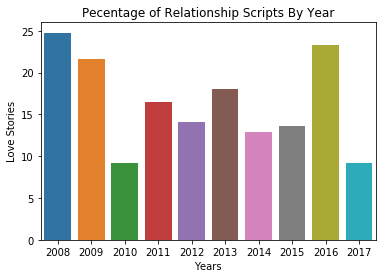

In [19]:
#plot percentage of love stories over the years
sns.barplot(x="Years", y="Love Stories", data=romance_df);
plt.title('Pecentage of Relationship Scripts By Year')


# True Stories

In [20]:
#import count function
from collections import Counter

#create list of words I want to seach for relationship descriptions
true_story = ['true', 'true story', 'biopic', 'biographical']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of relationship words
    for r in true_story:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
true_movies = len(list(set(Title)))/float(len(df))*100
true_movies

10.986267166042447

In [21]:
#create list to hold the number of movies by year
mega_list1 = []
#iterate through the unique years
for i in df.Year.unique(): 
#create a list to hold the number of movies temporarily by individual year
    super_list1 = []
#iterate through the unique years
    for f in range(len(df[df.Year == i])): 
#find the relationship movies in the unique years
        for r in true_story: 
#if the relationship words are in the description lock the result to the index
            if r in df[df.Year == i].Description.iloc[f]:

#lock each individual super list to the the index
                super_list1.append(df[df.Year == i].Title.iloc[f])
#append the super lists counts to the mega list
    mega_list1.append(len(set(super_list1)))
mega_list1

[5, 6, 8, 6, 5, 11, 3, 9, 20, 15]

In [22]:
#create a list of years to match the other value lists to
years_date = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
years_date

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [23]:
#create full counts of movies by year
years = []
years.append(len(df_2008))
years.append(len(df_2009))
years.append(len(df_2010))
years.append(len(df_2011))
years.append(len(df_2012))
years.append(len(df_2013))
years.append(len(df_2014))
years.append(len(df_2015))
years.append(len(df_2016))
years.append(len(df_2017))
print years

[105, 97, 76, 73, 78, 72, 70, 81, 73, 76]


In [24]:
#create a data frame of the three lists
true_df = pd.DataFrame({'Years' : years_date,
 'True Story count' : mega_list1,
 'Total count':years
  }, columns=['Years','True Story count', 'Total count'])
true_df

,Years,True Story count,Total count
0,2008,5,105
1,2009,6,97
2,2010,8,76
3,2011,6,73
4,2012,5,78
5,2013,11,72
6,2014,3,70
7,2015,9,81
8,2016,20,73
9,2017,15,76


In [25]:
#calculate the percentage of movies that are romantic by year
true_df['True Stories'] = true_df['True Story count']/true_df['Total count'] * 100
true_df

,Years,True Story count,Total count,True Stories
0,2008,5,105,4.761905
1,2009,6,97,6.185567
2,2010,8,76,10.526316
3,2011,6,73,8.219178
4,2012,5,78,6.410256
5,2013,11,72,15.277778
6,2014,3,70,4.285714
7,2015,9,81,11.111111
8,2016,20,73,27.397260
9,2017,15,76,19.736842


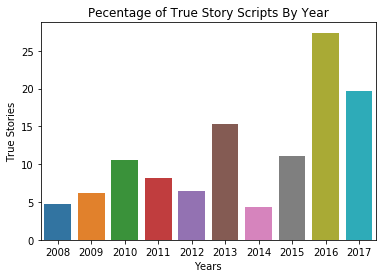

In [26]:
#plot percentage of love stories over the years
sns.barplot(x="Years", y="True Stories", data=true_df);
plt.title('Pecentage of True Story Scripts By Year')

# Thrillers

In [27]:
#import count function
from collections import Counter

#create list of words I want to seach for relationship descriptions
thriller = ['kidnapped', 'murder','murdered', 'death', 'spy', 'spies', 'killer', 'serial killer', 'assassin', 'prison', 'imprisonment', 'cop','cops','police', 'torture', 'revenge']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of relationship words
    for r in thriller:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
thriller_movies = len(list(set(Title)))/float(len(df))*100
thriller_movies

21.34831460674157

In [28]:
#create list to hold the number of movies by year
mega_list2 = []
#iterate through the unique years
for i in df.Year.unique(): 
#create a list to hold the number of movies temporarily by individual year
    super_list2 = []
#iterate through the unique years
    for f in range(len(df[df.Year == i])): 
#find the relationship movies in the unique years
        for r in thriller: 
#if the relationship words are in the description lock the result to the index
            if r in df[df.Year == i].Description.iloc[f]:

#lock each individual super list to the the index
                super_list2.append(df[df.Year == i].Title.iloc[f])
#append the super lists counts to the mega list
    mega_list2.append(len(set(super_list2)))
mega_list2

[23, 26, 17, 15, 14, 15, 13, 23, 8, 17]

In [29]:
#create a data frame of the three lists
thriller_df = pd.DataFrame({'Years' : years_date,
 'Thriller count' : mega_list2,
 'Total count':years
  }, columns=['Years','Thriller count', 'Total count'])
thriller_df

,Years,Thriller count,Total count
0,2008,23,105
1,2009,26,97
2,2010,17,76
3,2011,15,73
4,2012,14,78
5,2013,15,72
6,2014,13,70
7,2015,23,81
8,2016,8,73
9,2017,17,76


In [30]:
#calculate the percentage of movies that are romantic by year
thriller_df['Thrillers'] = thriller_df['Thriller count']/thriller_df['Total count'] * 100
thriller_df

,Years,Thriller count,Total count,Thrillers
0,2008,23,105,21.904762
1,2009,26,97,26.804124
2,2010,17,76,22.368421
3,2011,15,73,20.547945
4,2012,14,78,17.948718
5,2013,15,72,20.833333
6,2014,13,70,18.571429
7,2015,23,81,28.395062
8,2016,8,73,10.958904
9,2017,17,76,22.368421


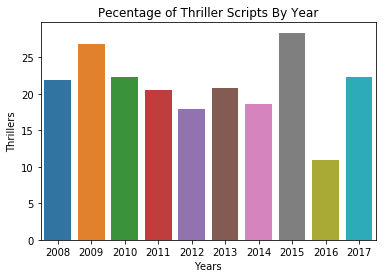

In [31]:
#plot percentage of love stories over the years
sns.barplot(x="Years", y="Thrillers", data=thriller_df);
plt.title('Pecentage of Thriller Scripts By Year')

# War Stories

In [32]:
#import count function
from collections import Counter

#create list of words I want to seach for relationship descriptions
war = ['war', 'civilian', 'soldier']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of relationship words
    for r in war:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
war_movies = len(list(set(Title)))/float(len(df))*100
war_movies

7.365792759051186

In [33]:
#create list to hold the number of movies by year
mega_list3 = []
#iterate through the unique years
for i in df.Year.unique(): 
#create a list to hold the number of movies temporarily by individual year
    super_list3 = []
#iterate through the unique years
    for f in range(len(df[df.Year == i])): 
#find the relationship movies in the unique years
        for r in war: 
#if the relationship words are in the description lock the result to the index
            if r in df[df.Year == i].Description.iloc[f]:

#lock each individual super list to the the index
                super_list3.append(df[df.Year == i].Title.iloc[f])
#append the super lists counts to the mega list
    mega_list3.append(len(set(super_list3)))
mega_list3

[6, 8, 2, 4, 7, 5, 7, 11, 5, 4]

In [34]:
#create a data frame of the three lists
war_df = pd.DataFrame({'Years' : years_date,
 'War count' : mega_list3,
 'Total count':years
  }, columns=['Years','War count', 'Total count'])
war_df

,Years,War count,Total count
0,2008,6,105
1,2009,8,97
2,2010,2,76
3,2011,4,73
4,2012,7,78
5,2013,5,72
6,2014,7,70
7,2015,11,81
8,2016,5,73
9,2017,4,76


In [35]:
#calculate the percentage of movies that are romantic by year
war_df['War Stories'] = war_df['War count']/war_df['Total count'] * 100
war_df

,Years,War count,Total count,War Stories
0,2008,6,105,5.714286
1,2009,8,97,8.247423
2,2010,2,76,2.631579
3,2011,4,73,5.479452
4,2012,7,78,8.974359
5,2013,5,72,6.944444
6,2014,7,70,10.000000
7,2015,11,81,13.580247
8,2016,5,73,6.849315
9,2017,4,76,5.263158


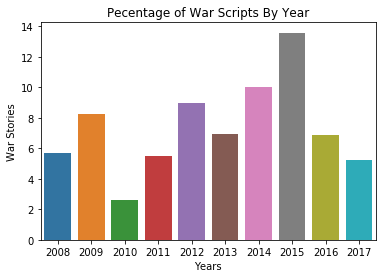

In [36]:
#plot percentage of love stories over the years
sns.barplot(x="Years", y="War Stories", data=war_df);
plt.title('Pecentage of War Scripts By Year')

# Comedy

In [37]:
#import count function
from collections import Counter

#create list of words I want to seach for comedy descriptions
comedy = ['comedy', 'romcom', 'funny']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of relationship words
    for r in comedy:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
comedy_movies = len(list(set(Title)))/float(len(df))*100
comedy_movies

1.7478152309612984

In [89]:
#create list to hold the number of movies by year
mega_list4 = []
#iterate through the unique years
for i in df.Year.unique(): 
#create a list to hold the number of movies temporarily by individual year
    super_list4 = []
#iterate through the unique years
    for f in range(len(df[df.Year == i])): 
#find the comedy movies in the unique years
        for r in comedy: 
#if the relationship words are in the description lock the result to the index
            if r in df[df.Year == i].Description.iloc[f]:

#lock each individual super list to the the index
                super_list4.append(df[df.Year == i].Title.iloc[f])
#append the super lists counts to the mega list
    mega_list4.append(len(set(super_list4)))
mega_list4

[3, 5, 2, 1, 0, 1, 1, 0, 1, 0]

In [90]:
#create a data frame of the three lists
comedy_df = pd.DataFrame({'Years' : years_date,
 'Comedy count' : mega_list4,
 'Total count':years
  }, columns=['Years','Comedy count', 'Total count'])
comedy_df

,Years,Comedy count,Total count
0,2008,3,105
1,2009,5,97
2,2010,2,76
3,2011,1,73
4,2012,0,78
5,2013,1,72
6,2014,1,70
7,2015,0,81
8,2016,1,73
9,2017,0,76


In [91]:
#calculate the percentage of movies that are romantic by year
comedy_df['Comedy Stories'] = comedy_df['Comedy count']/comedy_df['Total count'] * 100
comedy_df

,Years,Comedy count,Total count,Comedy Stories
0,2008,3,105,2.857143
1,2009,5,97,5.154639
2,2010,2,76,2.631579
3,2011,1,73,1.369863
4,2012,0,78,0.000000
5,2013,1,72,1.388889
6,2014,1,70,1.428571
7,2015,0,81,0.000000
8,2016,1,73,1.369863
9,2017,0,76,0.000000


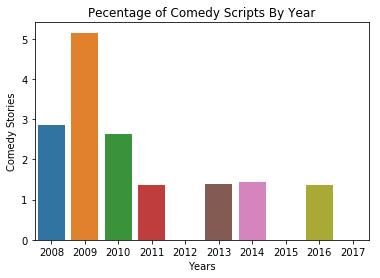

In [92]:
#plot percentage of love stories over the years
sns.barplot(x="Years", y="Comedy Stories", data=comedy_df);
plt.title('Pecentage of Comedy Scripts By Year')

# Heist Stories

In [94]:
#import count function
from collections import Counter

#create list of words I want to seach for comedy descriptions
heist = ['bank', 'rob', 'heist', 'mob']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of heist words
    for r in heist:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
heist_movies = len(list(set(Title)))/float(len(df))*100
heist_movies

4.619225967540574

In [95]:
#create list to hold the number of movies by year
mega_list5 = []
#iterate through the unique years
for i in df.Year.unique(): 
#create a list to hold the number of movies temporarily by individual year
    super_list5 = []
#iterate through the unique years
    for f in range(len(df[df.Year == i])): 
#find the relationship movies in the unique years
        for r in heist: 
#if the heist words are in the description lock the result to the index
            if r in df[df.Year == i].Description.iloc[f]:

#lock each individual super list to the the index
                super_list5.append(df[df.Year == i].Title.iloc[f])
#append the super lists counts to the mega list
    mega_list5.append(len(set(super_list5)))
mega_list5

[1, 9, 2, 2, 5, 2, 3, 3, 8, 2]

In [96]:
#create a data frame of the three lists
heist_df = pd.DataFrame({'Years' : years_date,
 'Heist count' : mega_list4,
 'Total count':years
  }, columns=['Years','Heist count', 'Total count'])
heist_df

,Years,Heist count,Total count
0,2008,3,105
1,2009,5,97
2,2010,2,76
3,2011,1,73
4,2012,0,78
5,2013,1,72
6,2014,1,70
7,2015,0,81
8,2016,1,73
9,2017,0,76


In [97]:
#calculate the percentage of movies that are romantic by year
heist_df['Heist Stories'] = heist_df['Heist count']/heist_df['Total count'] * 100
heist_df

,Years,Heist count,Total count,Heist Stories
0,2008,3,105,2.857143
1,2009,5,97,5.154639
2,2010,2,76,2.631579
3,2011,1,73,1.369863
4,2012,0,78,0.000000
5,2013,1,72,1.388889
6,2014,1,70,1.428571
7,2015,0,81,0.000000
8,2016,1,73,1.369863
9,2017,0,76,0.000000


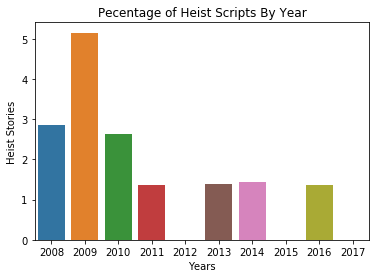

In [98]:
#plot percentage of love stories over the years
sns.barplot(x="Years", y="Heist Stories", data=heist_df);
plt.title('Pecentage of Heist Scripts By Year')

# SciFi Movies

In [99]:
#import count function
from collections import Counter

#create list of words I want to seach for comedy descriptions
scifi = ['robot', 'future', 'space', 'alien']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of scifi words
    for r in scifi:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
scifi_movies = len(list(set(Title)))/float(len(df))*100
scifi_movies

5.368289637952559

In [100]:
#create list to hold the number of movies by year
mega_list6 = []
#iterate through the unique years
for i in df.Year.unique(): 
#create a list to hold the number of movies temporarily by individual year
    super_list6 = []
#iterate through the unique years
    for f in range(len(df[df.Year == i])): 
#find the scifi movies in the unique years
        for r in scifi: 
#if the relationship words are in the description lock the result to the index
            if r in df[df.Year == i].Description.iloc[f]:

#lock each individual super list to the the index
                super_list6.append(df[df.Year == i].Title.iloc[f])
#append the super lists counts to the mega list
    mega_list6.append(len(set(super_list6)))
mega_list6

[2, 5, 6, 3, 7, 3, 2, 4, 7, 4]

In [101]:
#create a data frame of the three lists
scifi_df = pd.DataFrame({'Years' : years_date,
 'Scifi count' : mega_list6,
 'Total count':years
  }, columns=['Years','Scifi count', 'Total count'])
scifi_df

,Years,Scifi count,Total count
0,2008,2,105
1,2009,5,97
2,2010,6,76
3,2011,3,73
4,2012,7,78
5,2013,3,72
6,2014,2,70
7,2015,4,81
8,2016,7,73
9,2017,4,76


In [102]:
#calculate the percentage of movies that are romantic by year
scifi_df['Scifi Stories'] = scifi_df['Scifi count']/scifi_df['Total count'] * 100
scifi_df

,Years,Scifi count,Total count,Scifi Stories
0,2008,2,105,1.904762
1,2009,5,97,5.154639
2,2010,6,76,7.894737
3,2011,3,73,4.109589
4,2012,7,78,8.974359
5,2013,3,72,4.166667
6,2014,2,70,2.857143
7,2015,4,81,4.938272
8,2016,7,73,9.589041
9,2017,4,76,5.263158


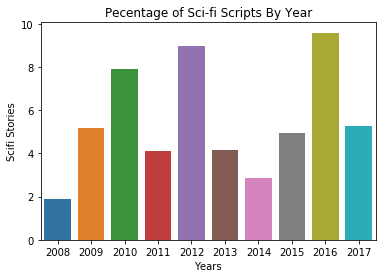

In [103]:
#plot percentage of love stories over the years
sns.barplot(x="Years", y="Scifi Stories", data=scifi_df);
plt.title('Pecentage of Sci-fi Scripts By Year')

# All Themes Based on Word Searches

In [104]:
#Put all of the theme outcomes over the 10 years into a data frame

Themes_all= {'Themes': ['Romance', 'True Stories', 'Thrillers', 'War', 'Comedy', 'Heist', 'Sci-Fi'],'percentage': [rela_movies, true_movies, thriller_movies, war_movies, comedy_movies, heist_movies, scifi_movies]}
Themes_df = pd.DataFrame(data=Themes_all)
Themes_df

,Themes,percentage
0,Romance,16.729089
1,True Stories,10.986267
2,Thrillers,21.348315
3,War,7.365793
4,Comedy,1.747815
5,Heist,4.619226
6,Sci-Fi,5.368290


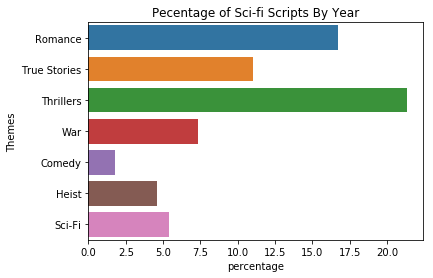

In [105]:
#plot percentage of love stories over the years
sns.barplot(x="percentage", y="Themes", data=Themes_df);
plt.title('Pecentage of Sci-fi Scripts By Year')

Searching descriptions for words is not the most effective way to account for all themes.

In [106]:
#Total percentage of movies accounted for with word search
Total = sum(Themes_df.percentage)
print 'Movies accounted for through search function:', Total, '%'

Movies accounted for through search function: 68.1647940075 %


# Movies Produced (wikipedia)

I've imported a list of movies that have been produced from the BlackList Wikipedia page. I want to see if there are any trends in how many movies have been produced since 2008, but I'm finding that Wikipedia is not the best resource for finding accurate information. lol. My findings suggest the Black List wikipedia peaked in 2010.

In [109]:
#Create SQLite connection to the database of Black list movies that were produced from wikipedia
database = "BlackListProduced.db"
connection = sql.connect(database)

In [110]:
#Create SQL query to union all data.

query1 = '''SELECT * FROM BlackList_Produced
'''
df1 = pd.read_sql_query(query1, connection)
df1.head()

,Year,Title
0,2008,47 Ronin
1,2008,50/50
2,2008,A.C.O.D.
3,2008,All I Wish
4,2008,Bachelorette


In [111]:
#create a function to find the percentage of movies that have been made by year
def calc_Grate(df, column, id):
    num_movies = df[df[column] == id].shape[0]
    num_made = df1[df1[column] == id].shape[0]
    return num_made / float(num_movies) * 100

(0, 100)

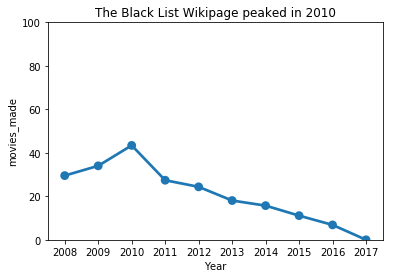

In [112]:
#create open list to get percentage of movies with financing
movies_made = []

#run loop to look for unique unique titles that were made
for num_made in df.Year.unique():

#append new list to the list of unique values
    movies_made.append(pd.DataFrame([[num_made, calc_Grate(df, 'Year', num_made)]],columns = ['Year','movies_made']))

#create data frame for the financing information    
percentage_made = pd.concat(movies_made)

sns.pointplot(
    x='Year',
    y='movies_made',
    data=percentage_made,
).set_title('The Black List Wikipage peaked in 2010')

plt.ylim(0, 100)

# Actual Genres and Themes of Scripts

This data set has the movie genres included so we can compare out searches to the actual data.

In [113]:
#Create SQLite connection to the database I made
database = "BlackList_Themes.db"
connection = sql.connect(database)

In [114]:
#Create SQL query to union all data.

query2 = '''SELECT * FROM BlackList_Themes
'''
df2 = pd.read_sql_query(query2, connection)
df2.head()

,Year,Number_of_Votes,Title,Theme,Description,Screenwriter,Gender,Agency,Agents,Management,Managers,Producer,Financier
0,2008,67,THE BEAVER,Comedy,"Walter Black, a depressed toy manufacturer, lo...",Kyle Killen,M,WME,Cliff Roberts,Anonymous Content,Keith Redmon,Anonymous Content,
1,2008,61,THE ORANGES,Romance,Two New Jersey families are thrown into comic ...,Jay Reiss & Ian Helfer,M,"CAA, Gersh","Spencer Baumgarten, Greg McKnight, Jessica Mat...","Mosaic Media Group, Principal Entertainment","Paul Nelson, Jimmy Miller, Ilan Breil, Danny S...",A Likely Story,Media Rights Capital
2,2008,44,BUTTER,Comedy,"Destiny, a black foster child, faces off again...",Jason Micallef,M,Endeavor,"Phil D’amecourt, Rich Cook",Washington Square Arts,Josh McGuire,Michael De Luca,
3,2008,42,BIG HOLE,Western,"Lee, an old, grumpy ex-cowboy, loses $30,000 t...",Michael Gilio,M,UTA,Julien Thuan,Industry Entertainment,Eryn Brown,Aversano Films,
4,2008,40,THE LOW DWELLER,Thriller/Horror,"Charlie “Slim” Hendrick, a don’t-eff-with-me e...",Brad Ingels,M,WME,"Mike Esola, Rob Carlson",Energy Entertainment,"Brooklyn Weaver, Adam Marshall","Scott Free Productions, Energy Entertainment, ...",Relativity


In [115]:
#create a function to find the percentage of movies themes
def calc_Grate(df, column, id):
    num_categories = df2[df2[column] == id].shape[0]
    return num_categories / float(len(df2)) * 100

(-1, 9)

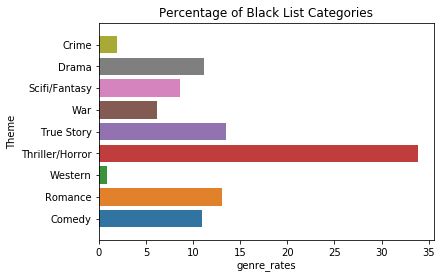

In [116]:
#create open list to get percentage of movies with financing
genre_rates = []

#run loop to look for unique theme values
for num_categories in df2.Theme.unique():

#append new list to the list of unique values
    genre_rates.append(pd.DataFrame([[num_categories, calc_Grate(df2, 'Theme', num_categories)]],columns = ['Theme','genre_rates']))

#create data frame for the genre information    
percentage_genre = pd.concat(genre_rates)

sns.barplot(
    x='genre_rates',
    y='Theme',
    data=percentage_genre
).set_title('Percentage of Black List Categories')

plt.ylim(-1,9)

# Trends SciKit-Learn Found

In [117]:
### opic modeling is similar to the clustering analysis, but with text data
#The point of this exerecise is to see what words python finds relative to one another


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 100

documents = df2['Description'].dropna()

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 2

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic:",topic_idx)
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

C:\Users\Demo\Anaconda2\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


('Topic:', 0)
story true based world war events united book love states
('Topic:', 1)
young man life family woman old girl year father love
('Topic:', 0)
story true based world year war life old high school
('Topic:', 1)
man young woman family new life father wife save finds


# Will these word clusters find a higher percentage of movie titles?

In [118]:
#import count function
from collections import Counter

#create list of words python clustered
scikit = ['story', 'true', 'based', 'world', 'war', 'events', 'united', 'book', 'love', 'states', 'young', 'man', 'life', 'family', 'woman', 'old', 'girl', 'year', 'father', 'high', 'school', 'new', 'save', 'finds']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of relationship words
    for r in scikit:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
scikit_movies = len(list(set(Title)))/float(len(df))*100
scikit_movies

80.27465667915106

This set of words is more effective at finding movie titles than all of our word searches put together. Unfortunately, there isn't anything distinctive about a category or genre they might belong to.

In [119]:
### opic modeling is similar to the clustering analysis, but with text data
#The point of this exerecise is to see what words python finds relative to one another


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 500

documents = df2['Description'].dropna()

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 2

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic:",topic_idx)
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

C:\Users\Demo\Anaconda2\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


('Topic:', 0)
life old young year man
('Topic:', 1)
story true based world war
('Topic:', 0)
family man young woman wife
('Topic:', 1)
story true based world young


In [120]:
#import count function
from collections import Counter

#create list of words python clustered
scikit2 = ['life', 'old', 'young', 'year', 'man', 'story', 'true', 'based', 'world', 'war', 'family']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of relationship words
    for r in scikit2:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
scikit2_movies = len(list(set(Title)))/float(len(df))*100
scikit2_movies

70.0374531835206

# Man

In [121]:
#import count function
from collections import Counter

#create list of word man
man_count = [' man']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of relationship words
    for r in man_count:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
man_movies = len(list(set(Title)))/float(len(df))*100
man_movies

13.732833957553058

# Woman

In [122]:
#import count function
from collections import Counter

#create list of word man
woman_count = [' woman']
#create lists to hold found lists of movies
#Years = []
Title = []
#iterate throught the length of the dataframe
for i in range(len(df)):
#iterate through the list of relationship words
    for r in woman_count:
#iterate through the series of descriptions
        if r in df.Description.iloc[i]:

#append the titles of movies to the locked index
            #Years.append(df.Year.iloc[i])
            Title.append(df.Title.iloc[i])
#Counter(Years)
#divide the length of the set list of titles by the full length of movies to find percentage of relationship movies
woman_movies = len(list(set(Title)))/float(len(df))*100
woman_movies

7.490636704119851

# Word Clusters by Year

In [123]:
### opic modeling is similar to the clustering analysis, but with text data
#The point of this exerecise is to see what words python finds relative to one another


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 100

documents = df_2008['Description'].dropna()

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 2

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic:",topic_idx)
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

C:\Users\Demo\Anaconda2\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


('Topic:', 0)
äù based love life novel
('Topic:', 1)
äôs story äù ex private
('Topic:', 0)
äù love äô based woman
('Topic:', 1)
äù äôs based life wife
